<a href="https://colab.research.google.com/github/Pooja-CG/STUDYSYNCHUB/blob/main/SMTP%2CMIME%2CScheduling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Automatic Email Marketing Using AI**



**SMTP (Simple mail tranfer protocol)**

In [ ]:
import smtplib
sender_email = 'studysynchub24@gmail.com'
rcvr_email = 'sherlys090303@gmail.com'
password ='rcnv gczv pium yyqi'
message = "Sending this message to ensure SMTP functionality is operating smoothly."
server = smtplib.SMTP('smtp.gmail.com',587)
server.starttls()
server.login(sender_email,password)
print("Login Success")
server.sendmail(sender_email,rcvr_email,message)
print("Email has been Sent to ",rcvr_email)

Login Success
Email has been Sent to  sherlys090303@gmail.com


Output :


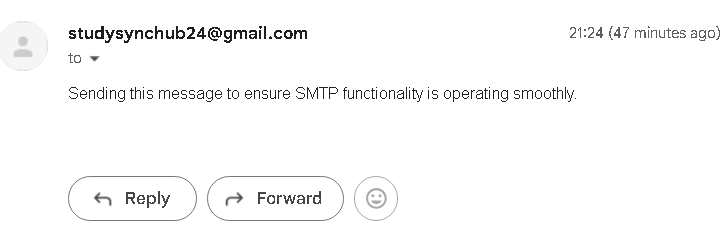

**MIME (Multipurpose Internet Mail Extensions)**

In [ ]:
import csv
import ssl
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email import encoders

from google.colab import files

# Upload the CSV file
uploaded_csv = files.upload()

# Upload the poster file
uploaded_poster = files.upload()

message = """Subject: Testing MIME and SMTP Functionality
Hi {Names}, Your Status is {Status}.

We're checking if MIME and SMTP functionalities are working properly.
If you can see this pamphlet attached, everything is in order.
"""

from_addr = "studysynchub24@gmail.com"
psw = input("Type your Password and Enter: ")
to_addr = "recipient@example.com"  # Change this to the recipient's email address
context = ssl.create_default_context()

# Create SMTP connection
server = smtplib.SMTP_SSL('smtp.gmail.com', 465, context=context)
server.ehlo()  # Can be omitted
server.login(from_addr, psw)

# Read data from uploaded CSV and send emails
for csv_filename in uploaded_csv.keys():
    with open(csv_filename, "r") as csv_file:
        reader = csv.reader(csv_file)
        next(reader)  # Skip the header row
        for Names, Emails, Status in reader:
            # Create a multipart message
            msg = MIMEMultipart()
            msg['From'] = from_addr
            msg['To'] = Emails
            msg['Subject'] = "Testing MIME and SMTP Functionality"

            # Attach the message content
            msg.attach(MIMEText(message.format(Names=Names, Status=Status), 'plain'))

            # Attach the poster file
            for poster_filename in uploaded_poster.keys():
                with open(poster_filename, "rb") as poster_file:
                    poster_part = MIMEBase("application", "octet-stream")
                    poster_part.set_payload(poster_file.read())

                encoders.encode_base64(poster_part)
                poster_part.add_header(
                    "Content-Disposition",
                    f"attachment; filename= {poster_filename}",
                )
                msg.attach(poster_part)

            # Send the email
            server.sendmail(from_addr, Emails, msg.as_string())

# Close SMTP connection
server.quit()


Saving pamplet.png to pamplet.png


Saving pamplet.png to pamplet (1).png
Type your Password and Enter: rcnv gczv pium yyqi


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte

Output :

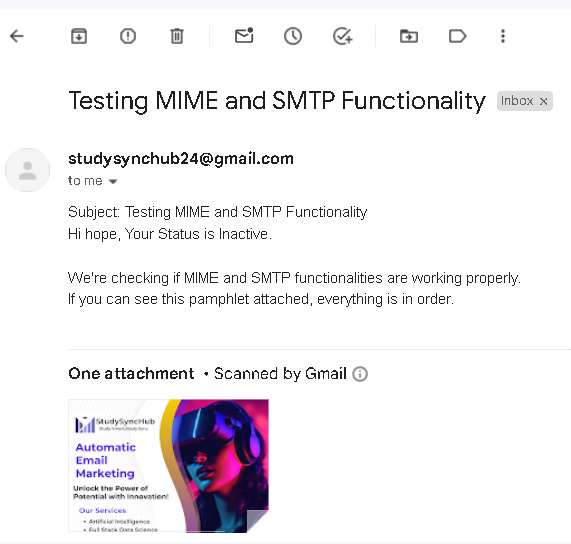

**Scheduling Email**

In [ ]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.image import MIMEImage
import datetime
import time

# Function to generate email content
def generate_email_content():
    email_content = "Hello! Please find the attached pamphlet."
    return email_content

# Email sender and recipient details
sender_email = 'studysynchub24@gmail.com'
recipient_email = 'sherlys090303@gmail.com'

# Create the email message
msg = MIMEMultipart()
msg['From'] = sender_email
msg['To'] = recipient_email
msg['Subject'] = 'Pamphlet Attached'

# Upload the PNG file
file_name = "D:/DataSets/pamplet.png"  # Change this to your file name
with open(file_name, 'rb') as file:
    image = file.read()

# Attach email content
email_content = generate_email_content()
msg.attach(MIMEText(email_content, 'plain'))

# Attach pamphlet file
attachment = MIMEImage(image, _subtype="png")
attachment.add_header('Content-Disposition', 'attachment', filename=file_name)
msg.attach(attachment)

# Calculate the ideal send time (today at 10:40PM)
ideal_send_time = datetime.datetime.combine(datetime.date.today(), datetime.time(22,40))

# Calculate the time difference between now and the ideal send time
now = datetime.datetime.now()
time_difference = ideal_send_time - now

# If the ideal send time has already passed for today, schedule it for tomorrow instead
if time_difference.total_seconds() < 0:
    ideal_send_time += datetime.timedelta(days=1)
    time_difference = ideal_send_time - now

seconds_to_wait = time_difference.total_seconds()

print(f"Scheduling email to be sent at {ideal_send_time}...")
# Wait until the ideal send time
time.sleep(seconds_to_wait)

# Connect to SMTP server and send email
with smtplib.SMTP('smtp.gmail.com', 587) as server:
    server.starttls()
    server.login(sender_email, 'iihbzehypbheqmlx')  # Replace 'your_password' with your actual password
    server.sendmail(sender_email, recipient_email, msg.as_string())

print("Email sent successfully!")


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/LenM700Lg21H2/Desktop/SHERLY_PY/pamplet.png'

Output :

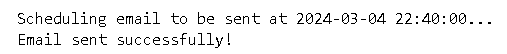

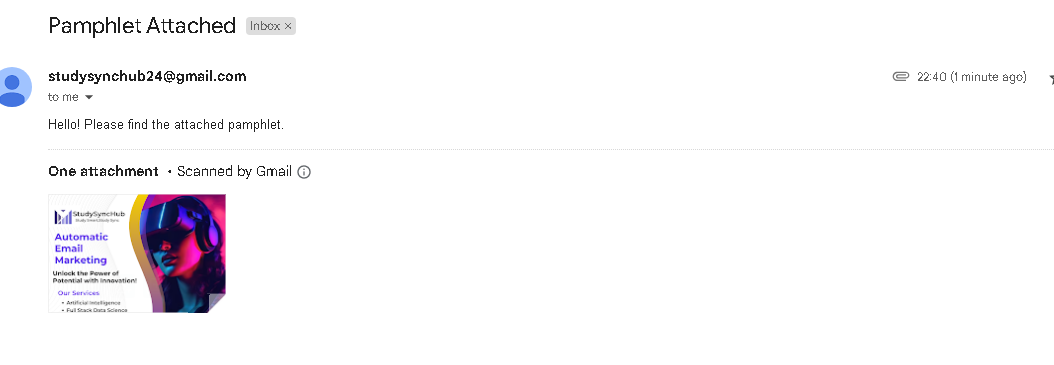